In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
import pickle

In [2]:
df=pd.read_csv("/content/drive/MyDrive/github/collegeproject/datasets/south_crop_class.csv")

In [3]:
df.columns

Index(['avg_year_temp', 'ph', 'rainfall', 'sowing_temp', 'harvesting_temp',
       'N', 'P', 'K', 'crop'],
      dtype='object')

In [ ]:
df.describe()

,avg_year_temp,ph,rainfall,sowing_temp,harvesting_temp,N,P,K
count,19354.000000,19354.000000,19354.000000,19354.000000,19354.000000,19354.000000,19354.000000,19354.000000
mean,25.310872,6.749232,80.548313,26.460252,26.319801,14.970678,30.837638,6.344918
std,4.515875,0.897372,55.583544,4.596210,6.472186,10.890863,24.606935,6.401048
min,14.062558,4.500211,7.501110,15.002345,14.003701,0.000000,0.000000,0.000000
25%,22.293138,6.219660,54.321871,23.133913,21.010482,7.396937,11.330428,0.000000
50%,25.380890,6.689410,67.638047,26.346951,24.875361,11.859976,22.290270,8.588940
75%,28.275284,7.153632,92.931267,29.636535,31.512740,22.038698,47.286632,11.394690
max,39.895564,9.992079,299.865346,39.997403,39.999557,45.994962,95.994671,27.997463


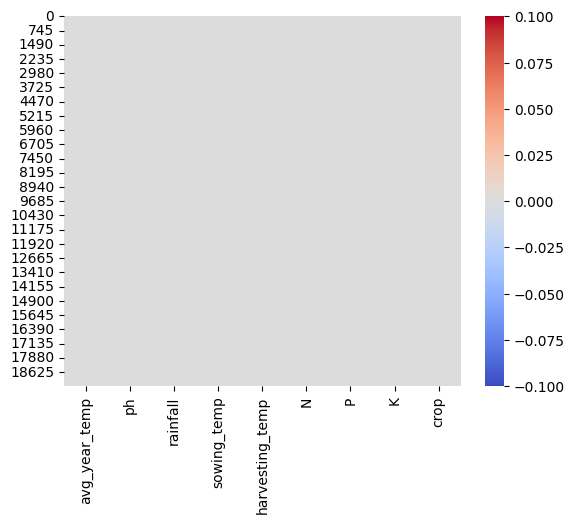

In [ ]:
# Heatmap to check null/missing values
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

<ipython-input-29-63152486fd9d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sowing_temp'],color="brown",bins=15,hist_kws={'alpha':0.2})
<ipython-input-29-63152486fd9d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['harvesting_temp'],color="green",bins=15,hist_kws={'alpha':0.2})
<i

<Axes: xlabel='avg_year_temp', ylabel='Density'>

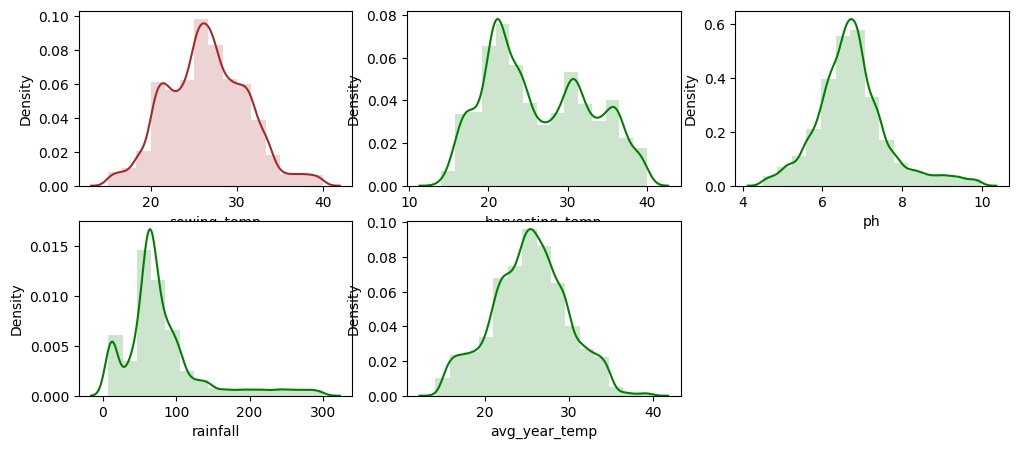

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(2, 3, 1)
sns.distplot(df['sowing_temp'],color="brown",bins=15,hist_kws={'alpha':0.2})
plt.subplot(2, 3, 2)
sns.distplot(df['harvesting_temp'],color="green",bins=15,hist_kws={'alpha':0.2})
plt.subplot(2, 3, 3)
sns.distplot(df['ph'],color="green",bins=15,hist_kws={'alpha':0.2})
plt.subplot(2, 3, 4)
sns.distplot(df['rainfall'],color="green",bins=15,hist_kws={'alpha':0.2})
plt.subplot(2, 3, 5)
sns.distplot(df['avg_year_temp'],color="green",bins=15,hist_kws={'alpha':0.2})

<Axes: xlabel='count', ylabel='crop'>

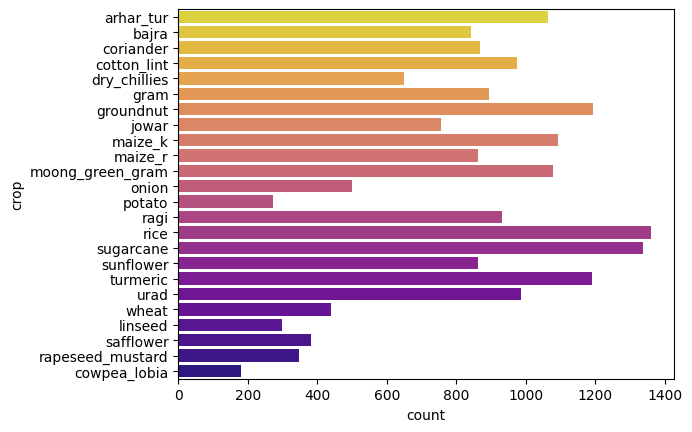

In [ ]:
sns.countplot(y='crop',data=df, palette="plasma_r")

In [ ]:
# sns.pairplot(df, hue = 'crop')

In [ ]:
df['crop'].unique()

array(['arhar_tur', 'bajra', 'coriander', 'cotton_lint', 'dry_chillies',
       'gram', 'groundnut', 'jowar', 'maize_k', 'maize_r',
       'moong_green_gram', 'onion', 'potato', 'ragi', 'rice', 'sugarcane',
       'sunflower', 'turmeric', 'urad', 'wheat', 'linseed', 'safflower',
       'rapeseed_mustard', 'cowpea_lobia'], dtype=object)

<Axes: xlabel='count', ylabel='crop'>

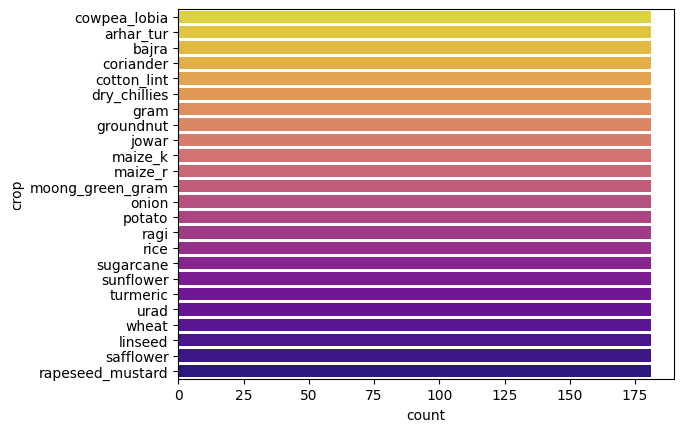

In [ ]:
from sklearn.utils import resample,shuffle
column_values = df['crop'].unique()
# Loop over the unique values of the column
for value in column_values:
    # Create a dataframe for each unique value
    df_1 = df[df['crop'] == value]

    other_df = df[df['crop'] != value]  
    #upsample the minority class
    df_sampled = resample(df_1,random_state=2022,n_samples=181,replace=False)
    df = pd.concat([df_sampled,other_df])
sns.countplot(y='crop',data=df, palette="plasma_r")

In [ ]:
# df.to_csv("/content/drive/MyDrive/github/collegeproject/datasets/uniform_distribution_south_crops.csv",index=False)

In [ ]:
sns.pairplot(df, hue = 'crop')

Output hidden; open in https://colab.research.google.com to view.

<Axes: xlabel='ph', ylabel='crop'>

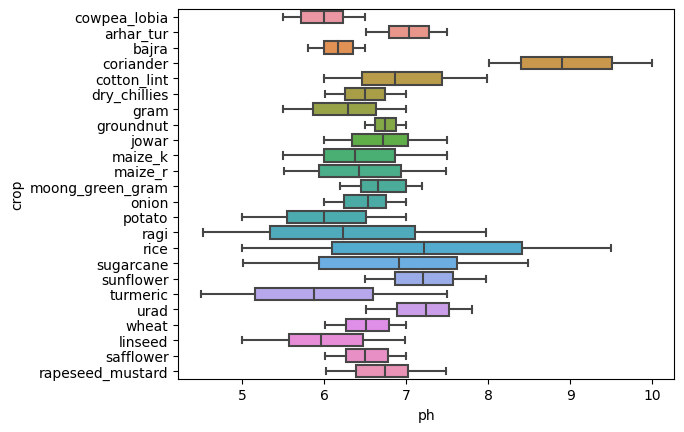

In [ ]:
sns.boxplot(y='crop',x='ph',data=df)

In [ ]:
c=df.crop.astype('category')
targets = dict(enumerate(c.cat.categories))
df['crop']=c.cat.codes

In [ ]:
df['crop'].unique()

array([ 4,  0,  1,  2,  3,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 17, 19,
       20, 21, 22, 23,  9, 18, 16], dtype=int8)

In [ ]:
x_copy=df.iloc[:,0:-1]

In [ ]:
x_copy

,avg_year_temp,ph,rainfall,sowing_temp,harvesting_temp,N,P,K
16618,22.702940,5.845088,91.862131,26.607883,34.034413,6.821450,21.755960,0.0
15441,24.569958,5.624795,96.639219,26.638548,32.679797,4.957434,22.820458,0.0
14287,27.433693,6.252594,106.645589,23.702859,30.198486,7.641628,19.882589,0.0
16607,31.584194,6.498542,80.561368,24.415226,32.230049,6.608759,21.990430,0.0
17645,23.749790,6.063552,109.123977,27.738933,30.065414,9.000982,21.169150,0.0
...,...,...,...,...,...,...,...,...
9973,22.139589,6.840126,35.400114,20.537032,28.163497,8.076888,25.275228,0.0
19112,24.769032,6.703712,28.369425,20.631630,28.370061,8.434715,24.899364,0.0
12758,22.442659,6.447812,28.743341,21.486114,29.448952,8.930017,25.558774,0.0
7486,23.395279,6.958663,31.582405,20.901751,28.786141,6.734272,22.587324,0.0


<Axes: >

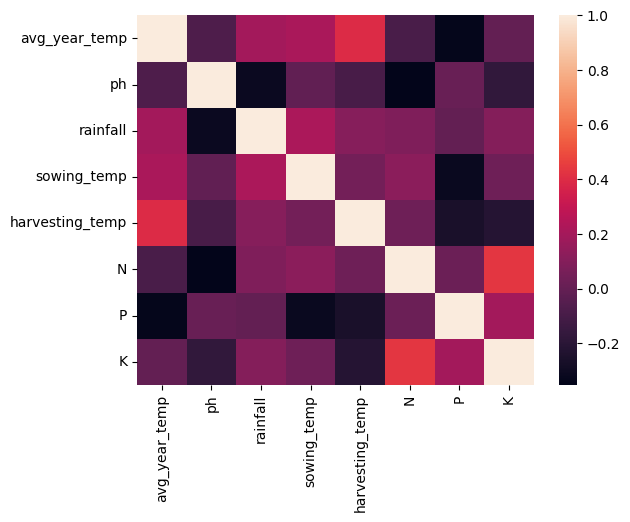

In [ ]:
sns.heatmap(x_copy.corr())

In [ ]:
x=df.iloc[:,0:-1].values 
y=df.iloc[:,-1].values
print("Inputs shape ",x.shape)
print("Outputs shape ",y.shape)


Inputs shape  (4344, 8)
Outputs shape  (4344,)


In [ ]:
# from sklearn.model_selection import train_test_split as tts
# from sklearn.preprocessing import MinMaxScaler

# x_train,x_test,y_train,y_test=tts(x,y,random_state=2022,test_size=0.2)

# scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train)

# # we must apply the scaling to the test set as well that we are computing for the training set
# x_test = scaler.transform(x_test)
# print(x_train.shape)
# print(x_test.shape
# print(y_train.shape)
# print(y_test.shape)

(1200, 7)
(300, 7)
(1200,)
(300,)


In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split as tts

x_train,x_test,y_train,y_test=tts(x,y,random_state=2022,test_size=0.2)
normzr=Normalizer()
x_train=normzr.fit_transform(x_train)
x_test=normzr.transform(x_test)

pickle.dump(normzr,open('/content/drive/MyDrive/github/collegeproject/pickle_files/southside/normalizer.pkl','wb'))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3475, 8)
(869, 8)
(3475,)
(869,)


Random forest Accuracy is:  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        33
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        30
           8       1.00      1.00      1.00        37
           9       1.00      1.00      1.00        38
          10       1.00      1.00      1.00        28
          11       1.00      1.00      1.00        37
          12       1.00      1.00      1.00        43
          13       1.00      1.00      1.00        42
          14       1.00      1.00      1.00        41
          15       1.00      1.00      1.00        43
          16       1.00      1.00      1.00    

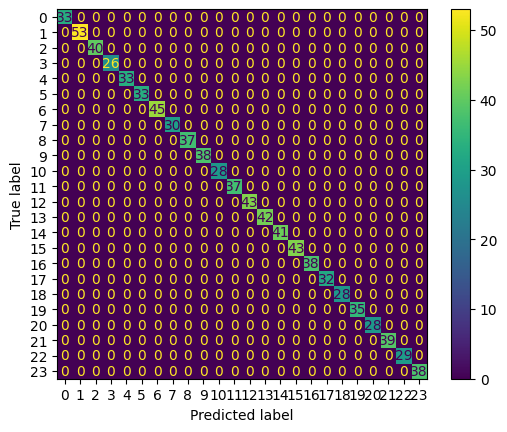

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,RocCurveDisplay,ConfusionMatrixDisplay

classifier = RandomForestClassifier(n_estimators=65,random_state=2022)
classifier.fit(x_train,y_train)
y_pred_forest=classifier.predict(x_test)

predicted_values = y_pred_forest
x = metrics.accuracy_score(y_test, predicted_values)
# acc.append(x)
# model.append('Random Forest')
print("Random forest Accuracy is: ", x*100)
matrix_plot=confusion_matrix(y_test, y_pred_forest, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=classifier.classes_)
disp.plot()
print(classification_report(y_test, y_pred_forest))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(x_train, y_train)
clf.score(x_test,y_test)

0.9896432681242808

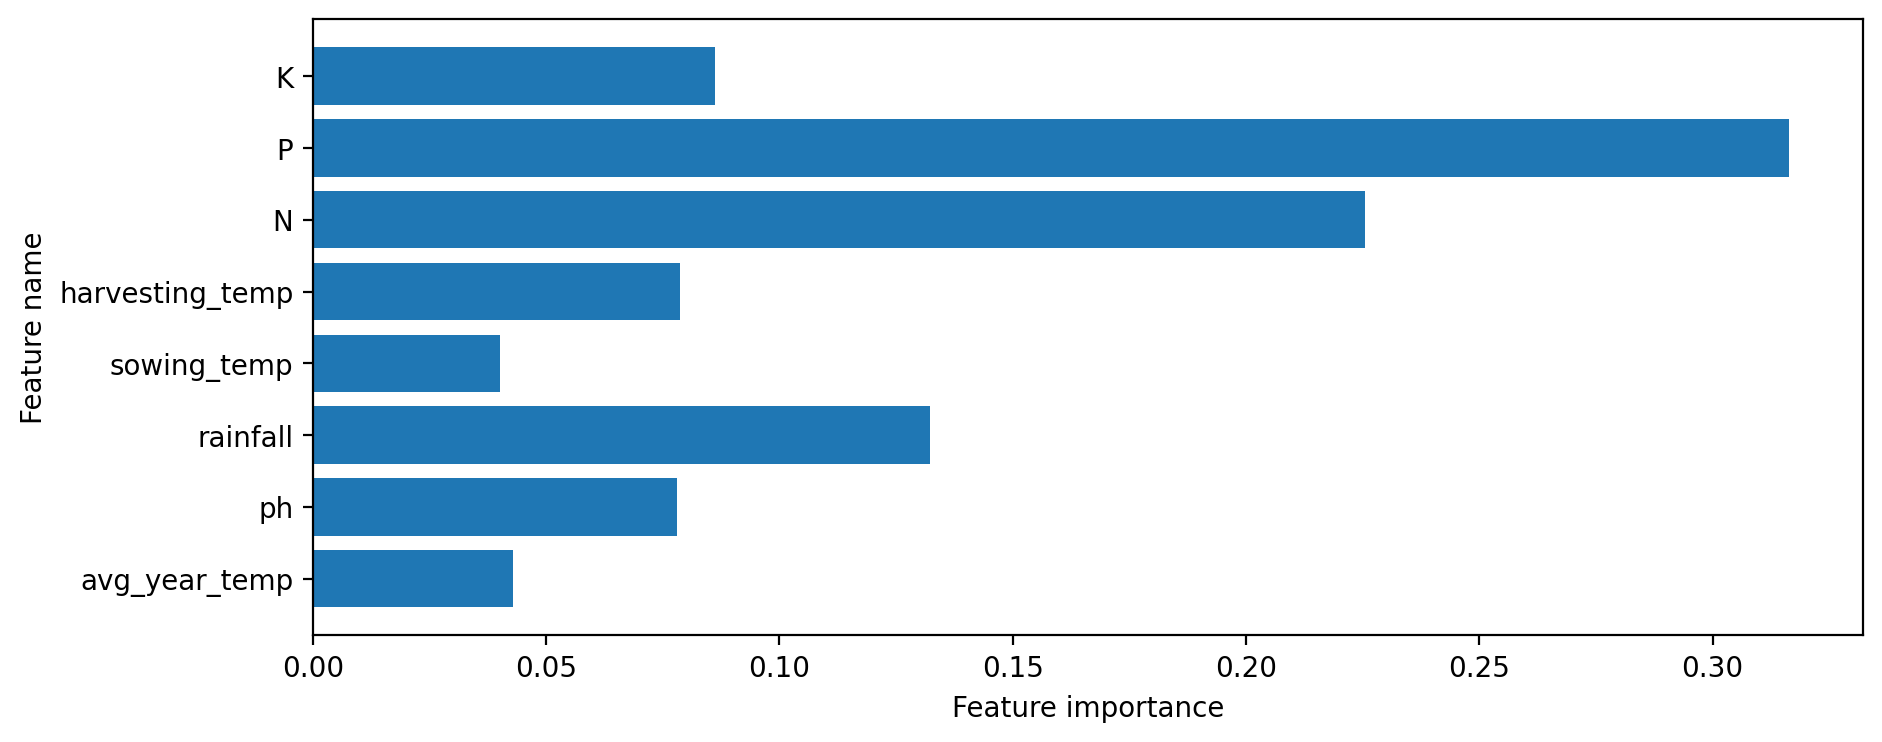

In [ ]:
plt.figure(figsize=(10,4), dpi=200)
c_features = len(x_copy.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), x_copy.columns)
plt.show()